In [2]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [16]:
adults = pd.read_csv("C:/DataAnalytics/py-adult-data-analysis/data/adult.csv")
adults.replace("?", np.nan, inplace=True)
adults.dropna(inplace=True)

In [5]:
adults.loc[(adults["salary K$"] <= 50)  & (adults["salary"] == ">50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


In [6]:
adults.loc[(adults["salary K$"] > 50)  & (adults["salary"] == "<=50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


# Task 1
Print the count of men and women in the dataset.

In [52]:
gender_counts = adults["sex"].value_counts()
males = gender_counts["Male"]
females = gender_counts["Female"]
print(f"Males counts {males}, Females counts {females}")

Males counts 20380, Females counts 9782


# Task 2
Find the average age of men in dataset

In [53]:
adults[adults["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [64]:
poland_count = adults[adults["native-country"] == "Poland"].shape[0]
total_count = adults.shape[0]
(poland_count / total_count) * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [9]:
high_salary_std = adults[adults["salary"] == ">50K"]["age"].std()
low_salary_std = adults[adults["salary"] == "<=50K"]["age"].std()
print(
    f"High salary std {high_salary_std} \n"
      f"Low salary std {low_salary_std}"
)

High salary std 10.269632835673852 
Low salary std 13.464631257161633


In [18]:
high_salary_mean = adults[adults["salary"] == ">50K"]["age"].mean()
low_salary_mean = adults[adults["salary"] == "<=50K"]["age"].mean()
print(
    f"High salary mean {high_salary_mean} \n"
      f"Low salary mean {low_salary_mean}"
)

High salary mean 43.95911028236548 
Low salary mean 36.60806038668668


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [72]:
higher_education_levels = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
adults[
    (adults["education"].isin(higher_education_levels) == False) & 
    (adults["salary"] == ">50K")
]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [73]:
adults.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [21]:
married_man_high_salary = adults[
    (adults["marital-status"].str.startswith("Married")) &
    (adults["sex"] == "Male") &
    (adults["salary"] == ">50K")
].shape[0]

married_men_low_salary = adults[
    (adults["marital-status"].str.startswith("Married")) & 
    (adults["sex"] == "Male") & 
    (adults["salary"] == "<=50K")
].shape[0]

non_married_man_high_salary = adults[
    (~adults["marital-status"].str.startswith("Married")) & 
    (adults["sex"] == "Male") & 
    (adults["salary"] == ">50K")
].shape[0]

non_married_men_low_salary = adults[
    (~adults["marital-status"].str.startswith("Married")) & 
    (adults["sex"] == "Male") & 
    (adults["salary"] == "<=50K")
].shape[0]

print(
    f"Non married mans with high salary counts {non_married_man_high_salary} \n"
    f"Married mans with high salary counts {married_man_high_salary} \n"
    f"Non married mans with low salary counts {non_married_men_low_salary} \n"
    f"Married mans with low salary counts {married_men_low_salary}"
)

Non married mans with high salary counts 673 
Married mans with high salary counts 5723 
Non married mans with low salary counts 6932 
Married mans with low salary counts 7052


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [92]:
max_hours_per_week = adults["hours-per-week"].max()

adults[adults["hours-per-week"] == max_hours_per_week].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

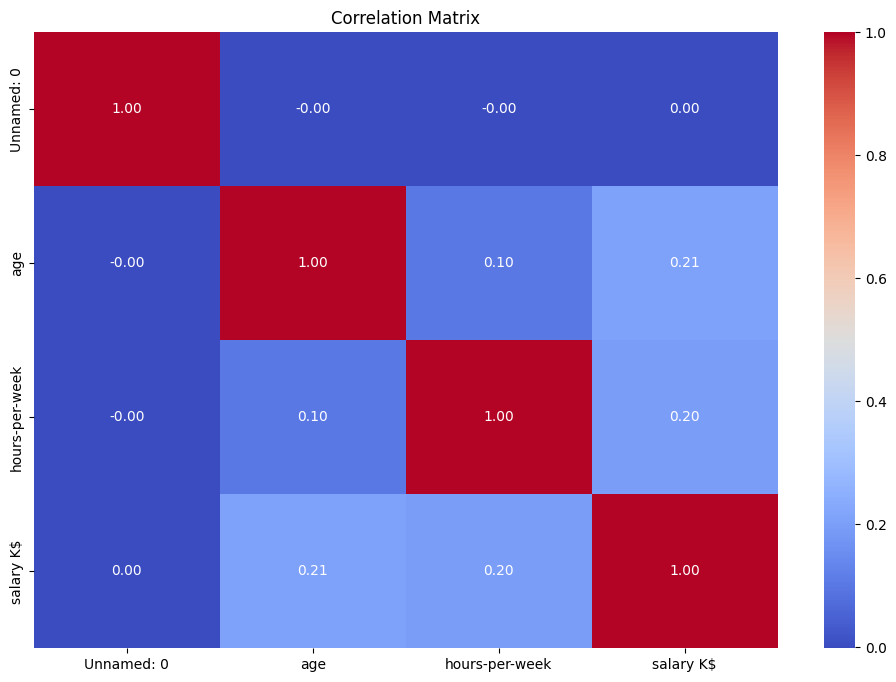

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = adults.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()